In [1]:
from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_comparison, plot_comparison_multi

import pandas as pd
import os

# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

# Per-checkpoint Analysis

In [ ]:
# config
IMAGE_FOLDER = "../Preproc2/images/"
INDEX_CSV_PATH = '../Preproc2/data/combined_index.csv'

METRIC_NAME = 'PLS'

BATCH_SIZE = 256
NUM_WORKERS = 15

# dict to save best ckpt info
best_ckpts = {
    "Random": "random",
    "Inet": "imagenet",
}

# load index
index_df = pd.read_csv(INDEX_CSV_PATH)

#! --------------- PARAMETERS ---------------

# folders
dir_supervised_no_diet      = "checkpoints/supervised_no-diet/20250915_023037_sgd"      #! CON AUG
dir_supervised_diet         = "checkpoints/supervised_diet/20251007_003003_sgd-correct" #! CON AUG
# dir_self_supervised_no_diet = "checkpoints/self-supervised_no-diet/20250922_144504_warmup+dynamic"
# dir_self_supervised_diet    = "checkpoints/self-supervised_diet/20250929_010742_warmup+dynamic"

N_BOOT = 5
N_SPLIT = 5
N_COMPONENTS = 100
LAYER_KEEP = ["pool1","pool2","relu3","relu4","pool5","fc6_relu","fc7_relu"]
EPOCHS = [30, 50, 70]

#### Supervised No-Diet

In [4]:
from plotter import analyze_checkpoints

snd_all_scores, snd_median_scores, snd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_supervised_no_diet,
    image_folder=IMAGE_FOLDER,
    index_csv_path=INDEX_CSV_PATH,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    device="cuda",
    save=True,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
    n_components=N_COMPONENTS,
    layers_keep=LAYER_KEEP,
    epochs=EPOCHS,
)
print(snd_best_info)
best_ckpts['supervised_no_diet'] = snd_best_info['checkpoint_path']

Checkpoints: 100%|██████████| 3/3 [3:39:43<00:00, 4394.52s/ckpt]  

{'checkpoint_name': 'checkpoint_epoch_50.pth', 'epoch': 50, 'overall_score': 0.3006739731710857, 'checkpoint_path': '/home/spina/Desktop/units/DL/project/mice-representation-clean/checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_50.pth'}


<Figure size 1500x1000 with 0 Axes>

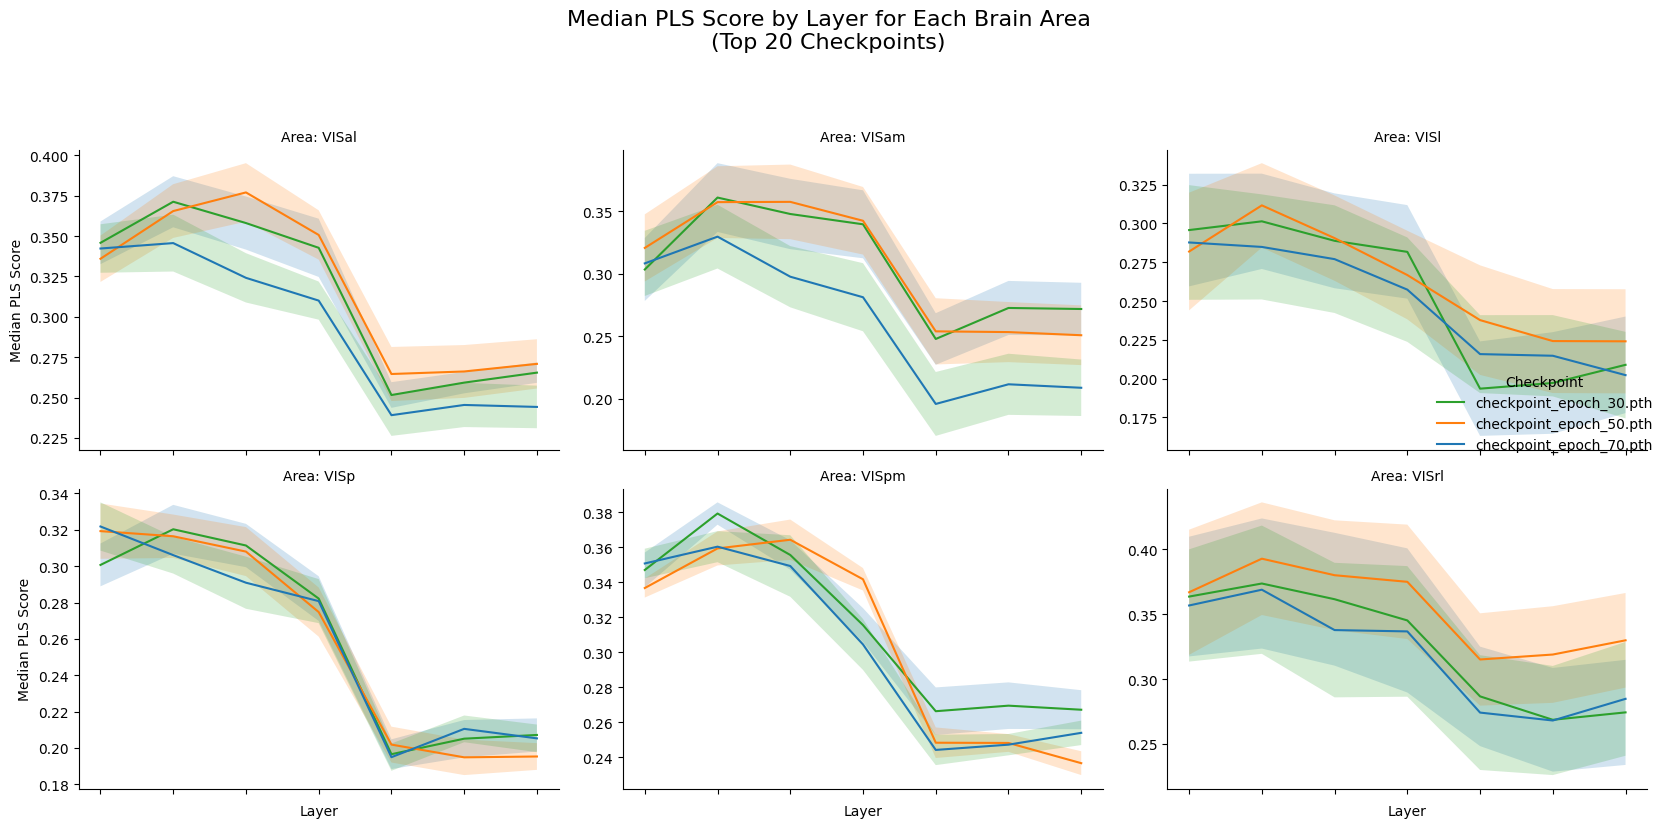

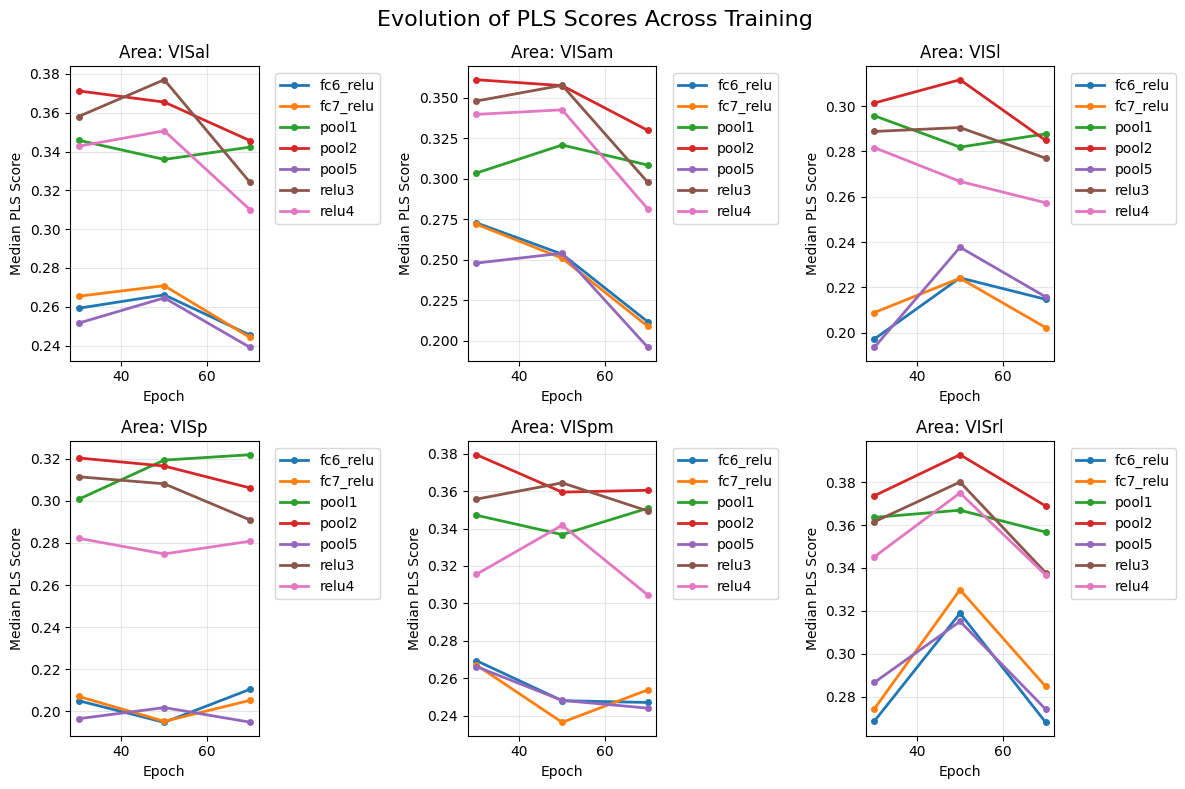

In [5]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(snd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(snd_median_scores, metric_name=METRIC_NAME)

#### Supervised Diet

In [7]:
from plotter import analyze_checkpoints

sd_all_scores, sd_median_scores, sd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_supervised_diet,
    image_folder=IMAGE_FOLDER,
    index_csv_path=INDEX_CSV_PATH,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    device="cuda",
    save=True,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
    n_components=N_COMPONENTS,
    layers_keep=LAYER_KEEP,
    epochs=EPOCHS,
)
print(sd_best_info)
best_ckpts['supervised_diet'] = sd_best_info['checkpoint_path']

Checkpoints: 100%|██████████| 3/3 [3:38:50<00:00, 4376.78s/ckpt]  

{'checkpoint_name': 'checkpoint_epoch_70.pth', 'epoch': 70, 'overall_score': 0.2891639057515858, 'checkpoint_path': '/home/spina/Desktop/units/DL/project/mice-representation-clean/checkpoints/supervised_diet/20251007_003003_sgd-correct/checkpoint_epoch_70.pth'}


<Figure size 1500x1000 with 0 Axes>

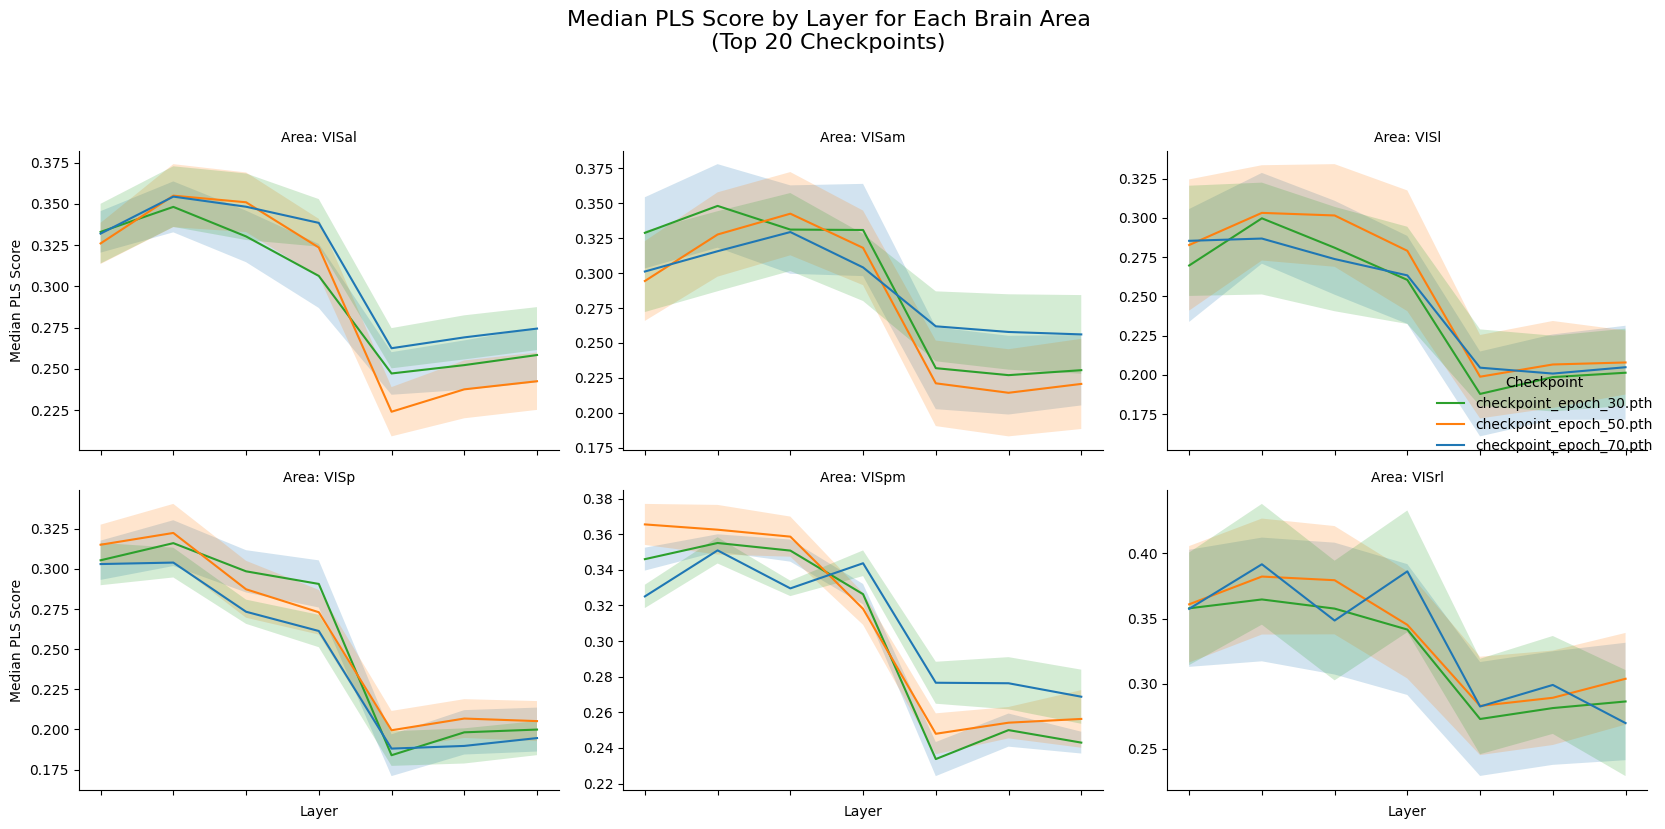

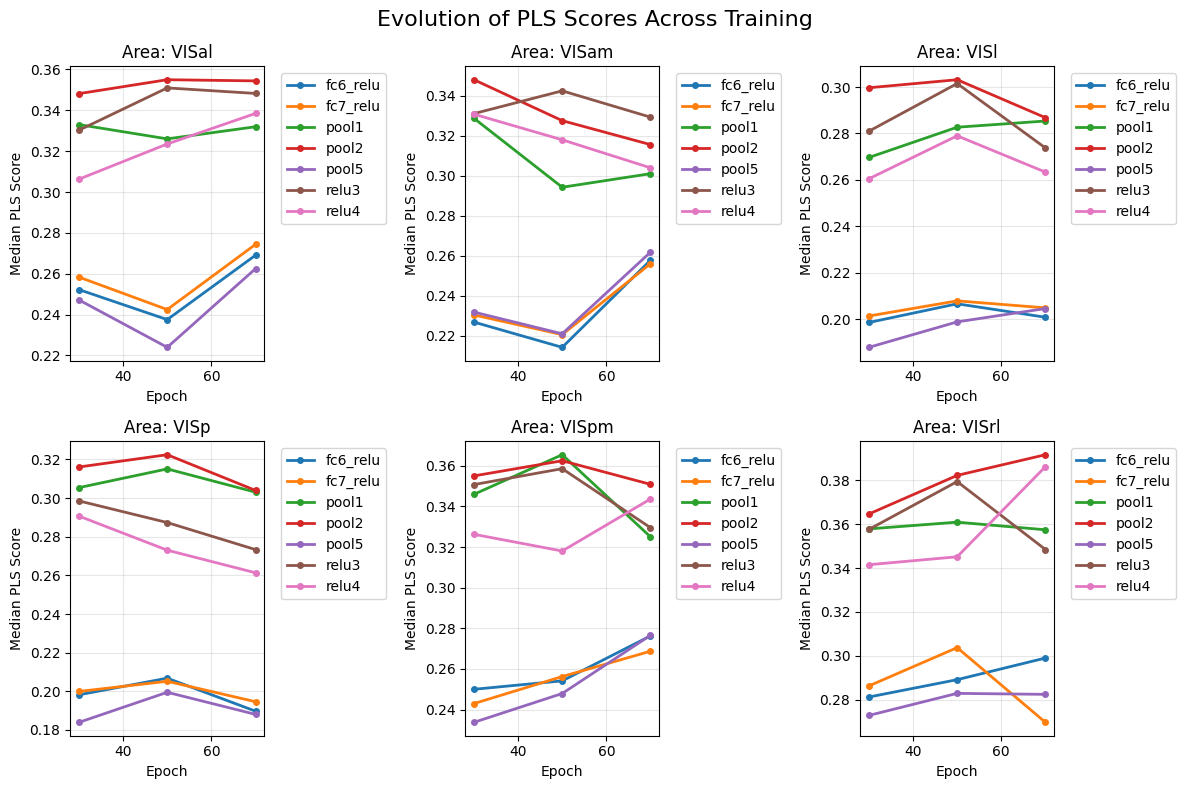

In [8]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(sd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(sd_median_scores, metric_name=METRIC_NAME)

#### Self-Supervised No-Diet

In [10]:
# from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
# plot_checkpoint_comparison(ssnd_median_scores, metric_name=METRIC_NAME)
# plot_checkpoint_evolution(ssnd_median_scores, metric_name=METRIC_NAME)

#### Best Checkpoint Per-Model Evaluation

In [21]:
best_random_scores = pd.read_pickle(f"artifacts/median_scores_random_100.pkl")

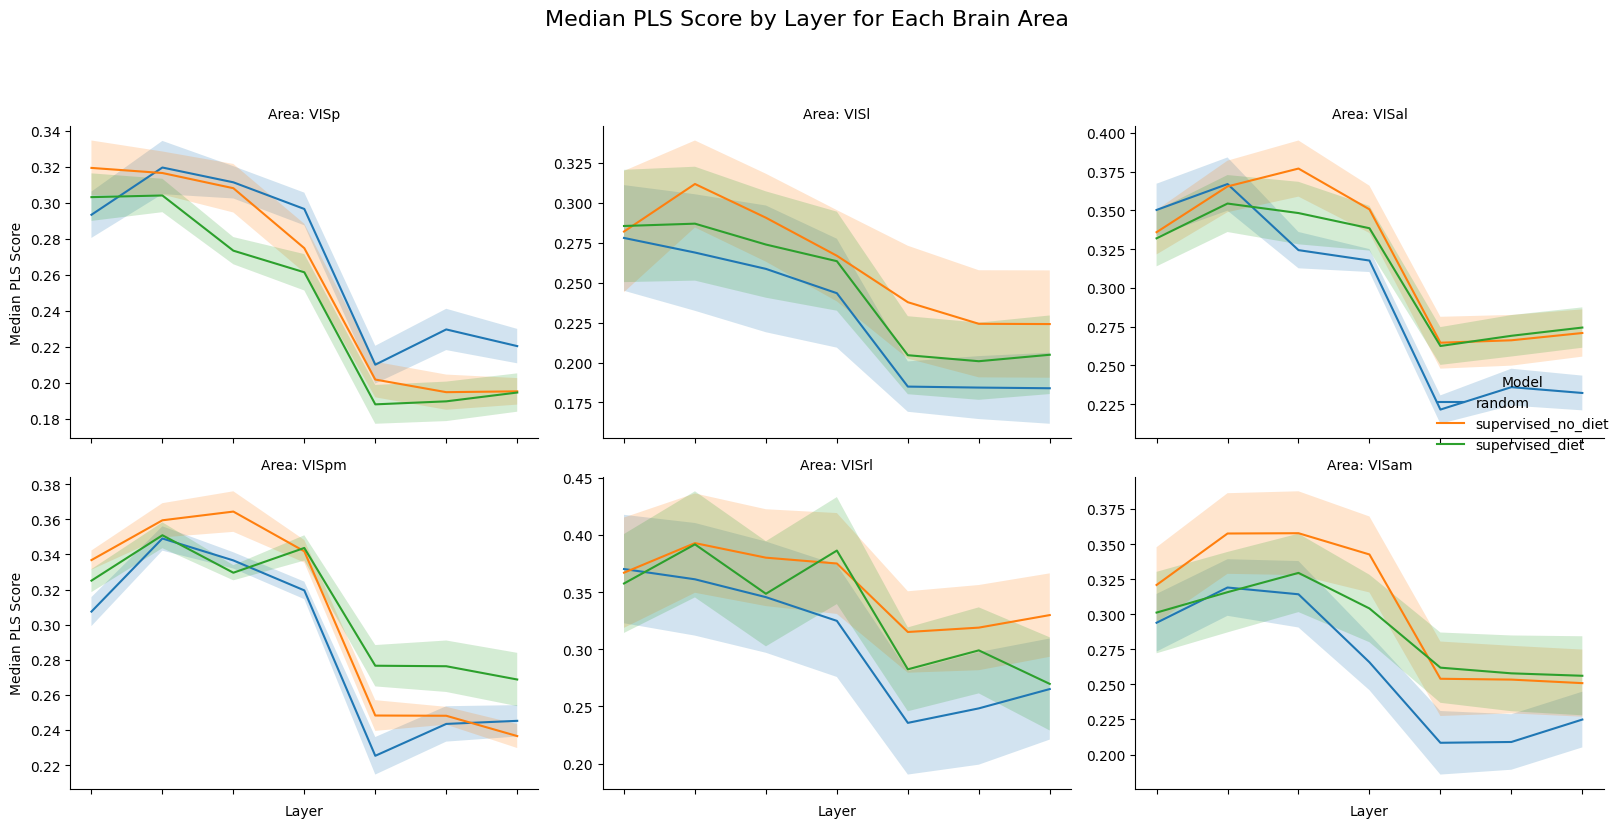

In [23]:
from plotter import plot_comparison_multi

best_scores = {
    "random": best_random_scores,
    "supervised_no_diet": best_snd_scores,
    "supervised_diet": best_sd_scores,
}

plot_comparison_multi(list(best_scores.values()), names=list(best_scores.keys()))